# software professionals across the world

The survey data was later open sourced by Stack Overflow.

<h2>Table of Contents</h2>

#### 1. [Importing needed Data](#import)
#### 2. [Cleaning Data](#cl)
#### 3. [Explority Of Data](#ana)
#### 4. [Conclusion](#con)


##  Importing Libraries :

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

<a id='import'></a>
##  Importing Data :

In [2]:
path= "m1_survey_data.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11552 entries, 0 to 11551
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11552 non-null  int64  
 1   MainBranch              11552 non-null  object 
 2   Hobbyist                11552 non-null  object 
 3   OpenSourcer             11552 non-null  object 
 4   OpenSource              11471 non-null  object 
 5   Employment              11552 non-null  object 
 6   Country                 11552 non-null  object 
 7   Student                 11499 non-null  object 
 8   EdLevel                 11436 non-null  object 
 9   UndergradMajor          10812 non-null  object 
 10  EduOther                11388 non-null  object 
 11  OrgSize                 11454 non-null  object 
 12  DevType                 11485 non-null  object 
 13  YearsCode               11543 non-null  object 
 14  Age1stCode              11539 non-null

In [5]:
df.describe().round(2)

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11552.00,1.073700e+04,10730.0,11427.00,9083.00,11255.00
mean,12362.21,7.499932e+05,131334.0,42.05,4.76,30.77
std,7271.94,9.639522e+06,294324.5,24.53,4.55,7.39
min,4.00,0.000000e+00,0.0,3.00,0.00,16.00
25%,6011.50,2.500000e+04,26727.0,40.00,2.00,25.00
50%,12323.50,6.500000e+04,57744.0,40.00,4.00,29.00
75%,18686.50,1.200000e+05,100000.0,43.00,5.00,35.00
max,25142.00,7.000000e+08,2000000.0,1012.00,99.00,99.00


<a id='cl'></a>
##  Cleaning Data :

-   Identify duplicate values in the dataset and remove it


In [6]:
df.duplicated().value_counts()

False    11398
True       154
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    11398
dtype: int64

-   Identify and Impute missing values in the dataset.


In [8]:
missing_data = df.isnull()
missing = pd.DataFrame(columns=["column","missing_count"])
for column in missing_data.columns.values.tolist() :
    miss = missing_data[column][missing_data[column]==True].count()
    df_m = pd.DataFrame([[column, miss]], columns=["column","missing_count"])
    missing = pd.concat([missing,df_m])
missing[missing["missing_count"]!=0]

,column,missing_count
0,OpenSource,81
0,Student,51
0,EdLevel,112
0,UndergradMajor,737
0,EduOther,164
...,...,...
0,Sexuality,542
0,Ethnicity,675
0,Dependents,140
0,SurveyLength,19


In [9]:
missing[missing["column"]=="WorkLoc"]

,column,missing_count
0,WorkLoc,32


In [10]:
# imputing missing workloc
Workloc = df["WorkLoc"].value_counts().idxmax()
df["WorkLoc"].replace(np.nan, Workloc, inplace=True)
df["WorkLoc"].isnull().value_counts()


False    11398
Name: WorkLoc, dtype: int64

-   Identify and Impute missing values in "Age" and ""WorkWeekHrs"" and "CodeRevHrs".

In [11]:
missing[missing["column"]=="Age"]

,column,missing_count
0,Age,287


In [12]:
Mean_Age = int(df["Age"].mean())
df["Age"].replace(np.nan, Mean_Age, inplace=True)
df["Age"].isnull().value_counts()

False    11398
Name: Age, dtype: int64

In [13]:
missing[missing["column"]=="WorkWeekHrs"]

,column,missing_count
0,WorkWeekHrs,122


In [14]:
Mean_WorkWeekHrs = int(df["WorkWeekHrs"].mean())
df["WorkWeekHrs"].replace(np.nan, Mean_WorkWeekHrs, inplace=True)
df["WorkWeekHrs"].isnull().value_counts()

False    11398
Name: WorkWeekHrs, dtype: int64

In [15]:
missing[missing["column"]=="CodeRevHrs"]

,column,missing_count
0,CodeRevHrs,2426


In [16]:
Mean_CodeRevHrs = int(df["CodeRevHrs"].mean())
df["CodeRevHrs"].replace(np.nan, Mean_CodeRevHrs, inplace=True)
df["CodeRevHrs"].isnull().value_counts()

False    11398
Name: CodeRevHrs, dtype: int64

-   Normalize data in the dataset.

There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq". 

This makes it difficult to compare the total compensation of the developers.

I will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.



In [17]:
df[["CompFreq","CompTotal"]].head()

,CompFreq,CompTotal
0,Yearly,61000.0
1,Yearly,138000.0
2,Yearly,90000.0
3,Monthly,29000.0
4,Yearly,90000.0


In [18]:
# I will Use the uniquew logic to arrive at the values for the column NormalizedAnnualCompensation.
# If the CompFreq is Yearly then use the exising value in CompTotal
# If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
# If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)
comp = list(zip(df["CompFreq"].values, df["CompTotal"].values))
Annual_Comp = []
for i , j in comp:
    if i == 'Yearly':
        Annual_Comp.append(j)
    elif i == 'Monthly':
        Annual_Comp.append(j*12)
    elif i == 'Weekly':
        Annual_Comp.append(j*52)
    else:
        Annual_Comp.append(np.nan)
df["ConvertedComp"]=Annual_Comp
df[["DevType","ConvertedComp"]].head()

,DevType,ConvertedComp
0,"Developer, full-stack",61000.0
1,"Database administrator;Developer, back-end;Dev...",138000.0
2,Data or business analyst;Database administrato...,90000.0
3,"Developer, full-stack",348000.0
4,"Developer, back-end;Developer, front-end;Devel...",90000.0


* imputing missing Compensation

In [19]:
comp_med = df["ConvertedComp"].median()
df["ConvertedComp"].replace(np.nan,comp_med, inplace=True)
df["ConvertedComp"].isnull().value_counts()

False    11398
Name: ConvertedComp, dtype: int64

<a id='ana'></a>
##  Explority of Data :

*   Identify the distribution of data in the dataset.

distribution curve for the column ConvertedComp

C:\Users\moman\AppData\Local\Temp\ipykernel_16696\1876320154.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.ConvertedComp)


<AxesSubplot: xlabel='ConvertedComp', ylabel='Density'>

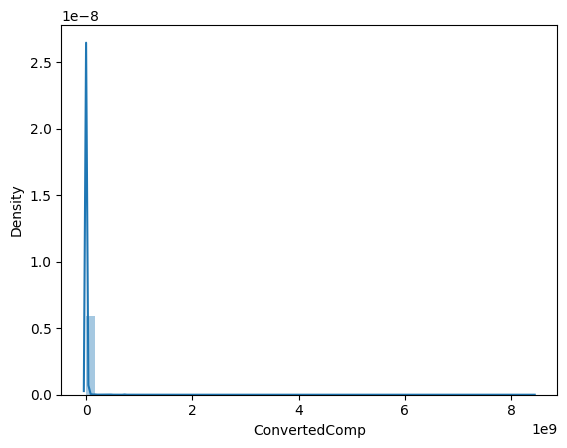

In [20]:
sns.distplot(df.ConvertedComp)

histogram for the column `ConvertedComp`

<function matplotlib.pyplot.show(close=None, block=None)>

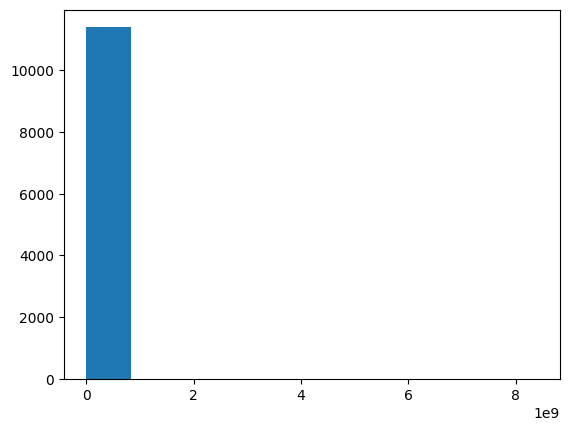

In [21]:
%matplotlib inline 
ax_2=plt.hist(df['ConvertedComp']) 
plt.show


The Median of of the column `ConvertedComp`

In [22]:
print("ConvertedComp Median:", df['ConvertedComp'].median())

ConvertedComp Median: 100000.0


responders identified themselves only as a **Man**

In [23]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

the  median ConvertedComp of responders identified themselves only as a **Woman**

In [24]:
df.ConvertedComp[df.Gender == 'Woman'].median()

95000.0

The summary for the column `Age`

In [25]:
df["Age"].describe()

count    11398.000000
mean        30.759282
std          7.301019
min         16.000000
25%         26.000000
50%         29.000000
75%         34.000000
max         99.000000
Name: Age, dtype: float64

(array([4.276e+03, 5.812e+03, 1.115e+03, 1.860e+02, 8.000e+00, 0.000e+00,
        1.000e+00]),
 array([16.        , 27.85714286, 39.71428571, 51.57142857, 63.42857143,
        75.28571429, 87.14285714, 99.        ]),
 <BarContainer object of 7 artists>)

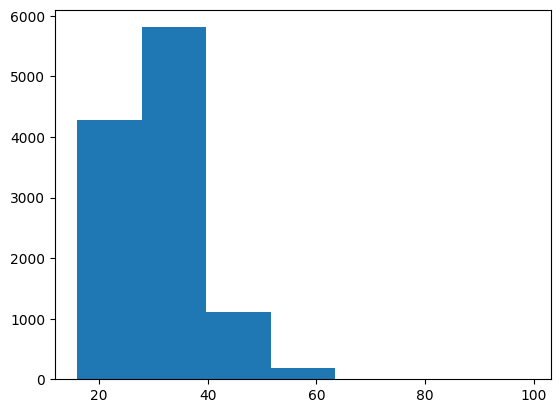

In [26]:
plt.hist(df['Age'],bins = 7) 

## Outliers

* The outliers exist in the column `ConvertedComp` using a box plot

<AxesSubplot: >

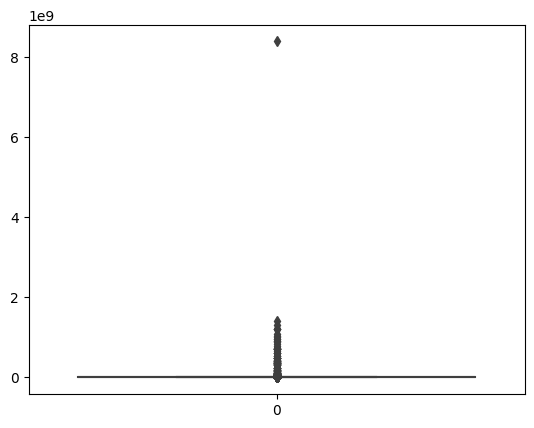

In [27]:
sns.boxplot(df.ConvertedComp)

In [28]:
# to remove numerical outliers
# column is str
def outlier_remove(Data,column):
    up_q = Data[column].quantile(0.75)
    lo_q = Data[column].quantile(0.25)
    q_range = up_q - lo_q
    print('The Inter Quartile Range :', q_range)
    upper=up_q+(q_range*1.5)
    lower=lo_q-(q_range*1.5)
    print('Upper Bound:', upper)
    print('Lower Bound:', lower)
    out =  Data[column][( Data[column] > upper) | ( Data[column] < lower)].count()
    print("Number of outliers :", out)
    df2 = Data[(Data[column] <= upper) & (Data[column] >= lower)]
    return df2


* remove ConvertedComp Outliers

In [29]:
df2 = outlier_remove(df,'ConvertedComp')

The Inter Quartile Range : 245000.0
Upper Bound: 667500.0
Lower Bound: -312500.0
Number of outliers : 1850


In [30]:
df2.ConvertedComp.describe()

count      9548.000000
mean     126604.370549
std      133533.273754
min           0.000000
25%       49000.000000
50%       90000.000000
75%      130000.000000
max      664800.000000
Name: ConvertedComp, dtype: float64

<AxesSubplot: >

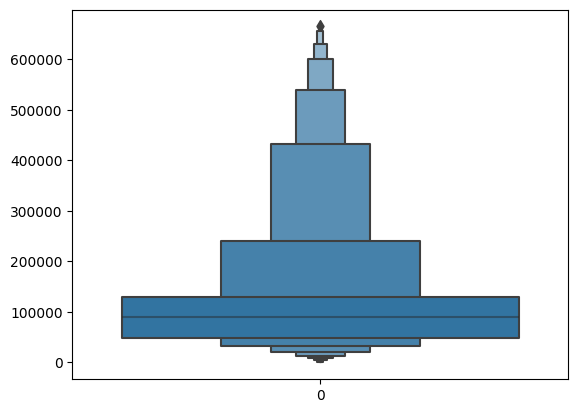

In [31]:
sns.boxenplot(df2['ConvertedComp']) 

* Check outlires of Age

<AxesSubplot: >

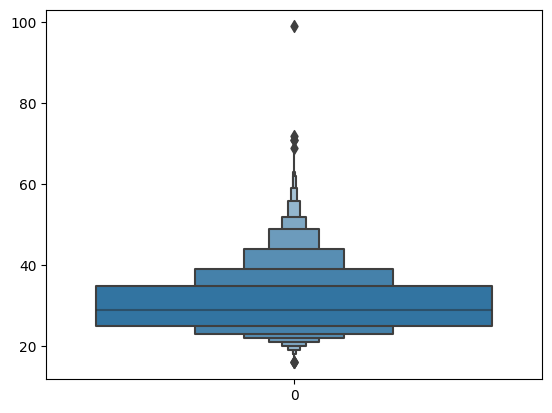

In [32]:
sns.boxenplot(df2['Age']) 

* remove Age outliers

In [33]:
df2 = outlier_remove(df2,'Age')

The Inter Quartile Range : 10.0
Upper Bound: 50.0
Lower Bound: 10.0
Number of outliers : 204


In [34]:
df2.Age.describe()

count    9344.000000
mean       30.277911
std         6.514429
min        16.000000
25%        25.000000
50%        29.000000
75%        34.000000
max        50.000000
Name: Age, dtype: float64

<AxesSubplot: >

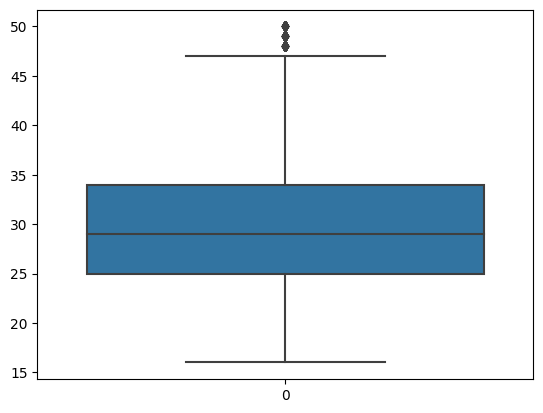

In [35]:
sns.boxplot(df2.Age)

* check outliers for "WorkWeekHrs"

## Correlation

In [36]:
df2.corr()

C:\Users\moman\AppData\Local\Temp\ipykernel_16696\1778878097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.010523,-0.001636,-0.011855,-0.008849,0.002779
CompTotal,-0.010523,1.000000,0.371907,0.056207,0.064866,0.122591
ConvertedComp,-0.001636,0.371907,1.000000,0.041260,0.040752,0.029655
WorkWeekHrs,-0.011855,0.056207,0.041260,1.000000,0.030813,0.035995
CodeRevHrs,-0.008849,0.064866,0.040752,0.030813,1.000000,-0.002366
Age,0.002779,0.122591,0.029655,0.035995,-0.002366,1.000000


### distrbution of convertedcomp

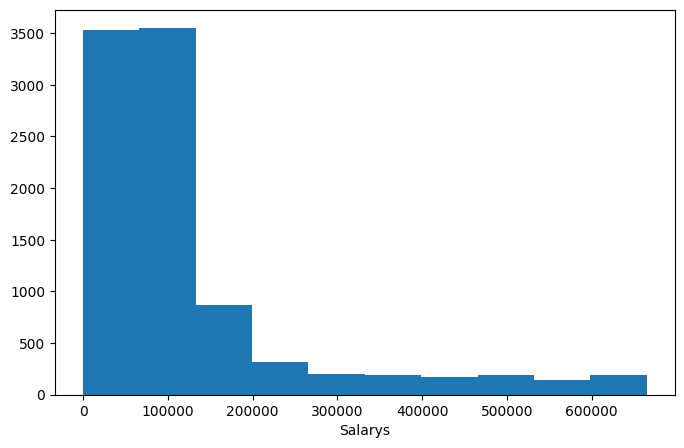

In [37]:
%matplotlib inline
plt.figure(figsize=(8,5))
ax =plt.hist(df2["ConvertedComp"])
plt.xlabel("Salarys")
plt.show()

* distrbution of Age

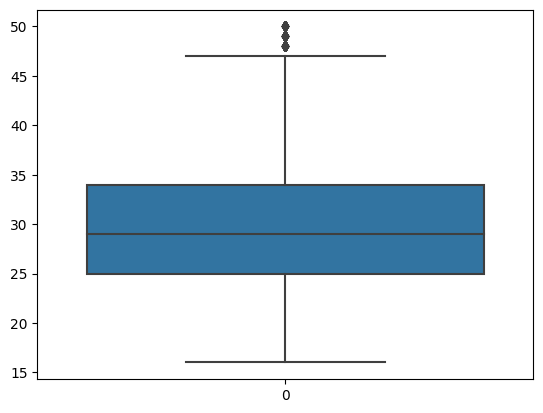

In [38]:
age = sns.boxplot(df2["Age"])
plt.show()

Relationship between `Age` and `WorkWeekHrs.`

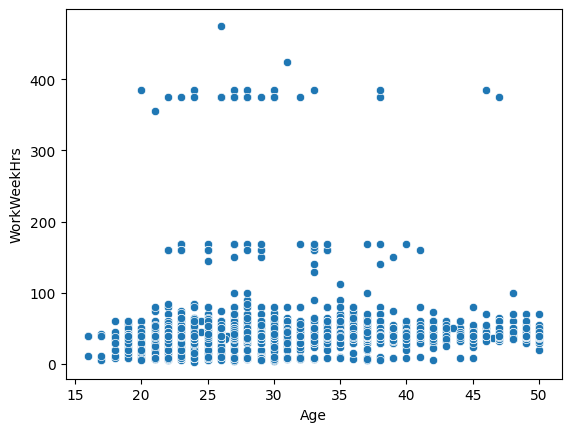

In [39]:
plot = sns.scatterplot(x="Age", y ="WorkWeekHrs",data=df2 )
plt.show()

* Relationships between `WorkWeekHrs` and `CodeRevHrs`and `Age` column as bubble size

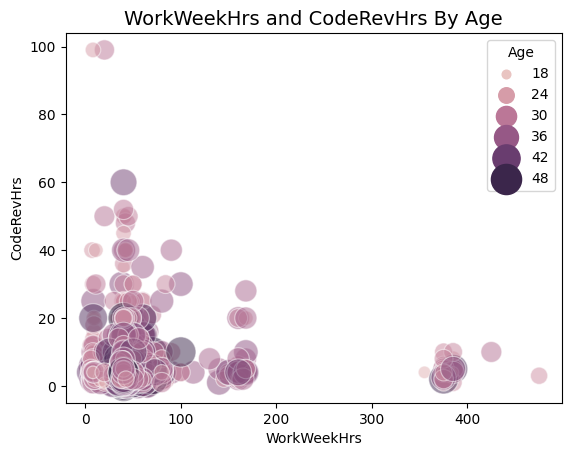

In [40]:
bubble = sns.scatterplot(data=df2, x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue='Age', alpha=0.5, sizes=(10, 500) )
plt.title('WorkWeekHrs and CodeRevHrs By Age', size=14) 
plt.xlabel('WorkWeekHrs', size=10) 
plt.ylabel('CodeRevHrs', size=10)

plt.show()

- the top 5 databases that respondents wish to learn next year

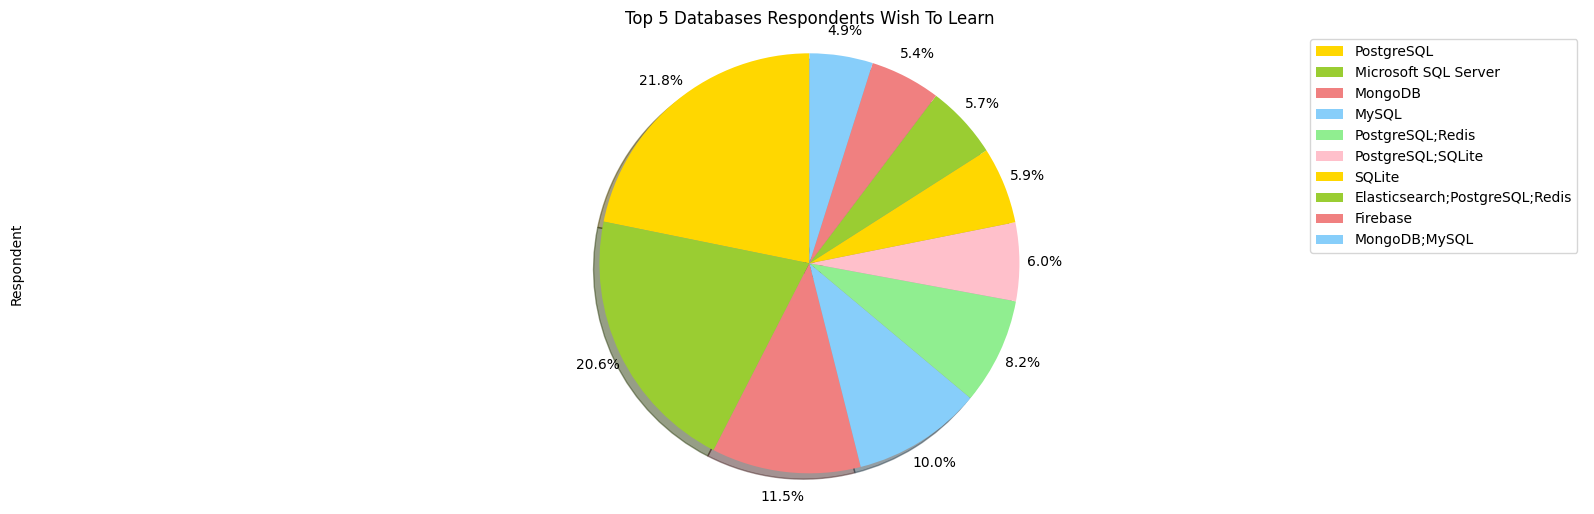

In [41]:
da = df2.pivot_table(index ='DatabaseDesireNextYear' ,values=["Respondent"], aggfunc='count' )
da = da.sort_values(by="Respondent",ascending=False)[:10]
da.reset_index(inplace=True)
colors_list=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

ax= da["Respondent"].plot.pie( figsize=(20,6), autopct='%1.1f%%', labels=None, startangle=90 ,colors=colors_list, shadow=True, pctdistance=1.12)  
plt.legend(labels=da["DatabaseDesireNextYear"], loc='upper right')
plt.title('Top 5 Databases Respondents Wish To Learn') 
plt.axis('equal')
plt.show()

- relation between `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35

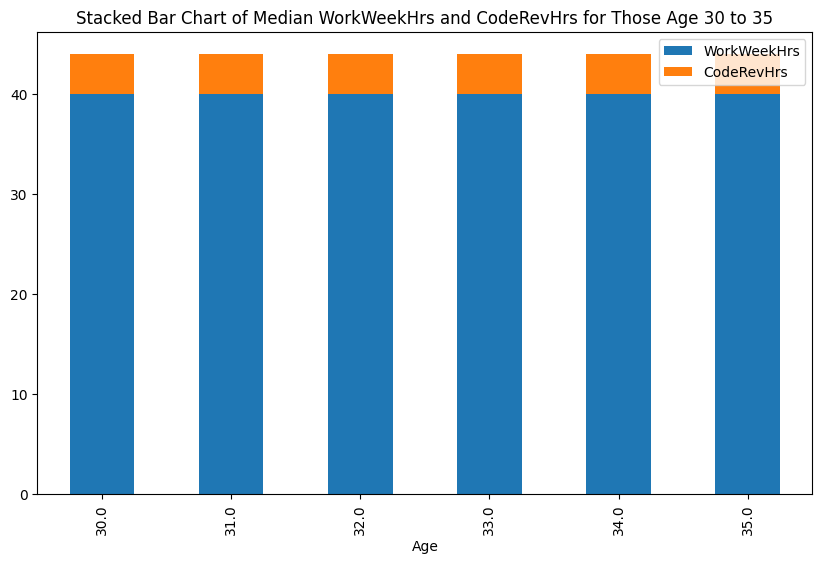

In [42]:
db = df2[["WorkWeekHrs","CodeRevHrs","Age"]][( df2["Age"] <= 35) & (df2["Age"] >= 30)]
db = db.groupby("Age").median()
db.reset_index(inplace=True)
db.plot.bar(x="Age",figsize=(10, 6), stacked=True)

plt.title('Stacked Bar Chart of Median WorkWeekHrs and CodeRevHrs for Those Age 30 to 35')
plt.show()

- Compration `ConvertedComp` for all ages from 45 to 60.

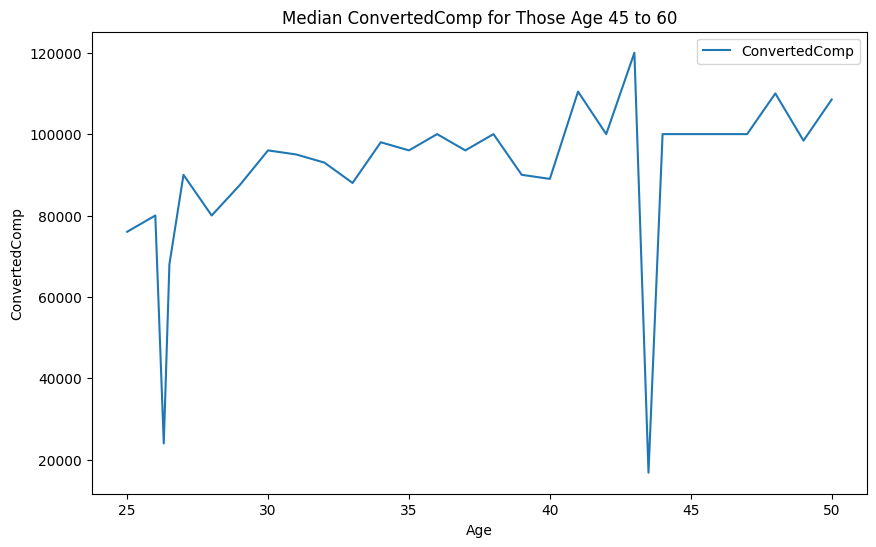

In [43]:
dc = df2[["ConvertedComp","Age"]][( df2["Age"] <= 60) & (df2["Age"] >= 25)]
dc = dc.groupby("Age").median()
dc.reset_index(inplace=True)
dc.plot.line(x="Age", y ="ConvertedComp",figsize=(10, 6))

plt.title('Median ConvertedComp for Those Age 45 to 60')
plt.ylabel('ConvertedComp')
plt.show()

- Numbers of Each `MainBranch.`

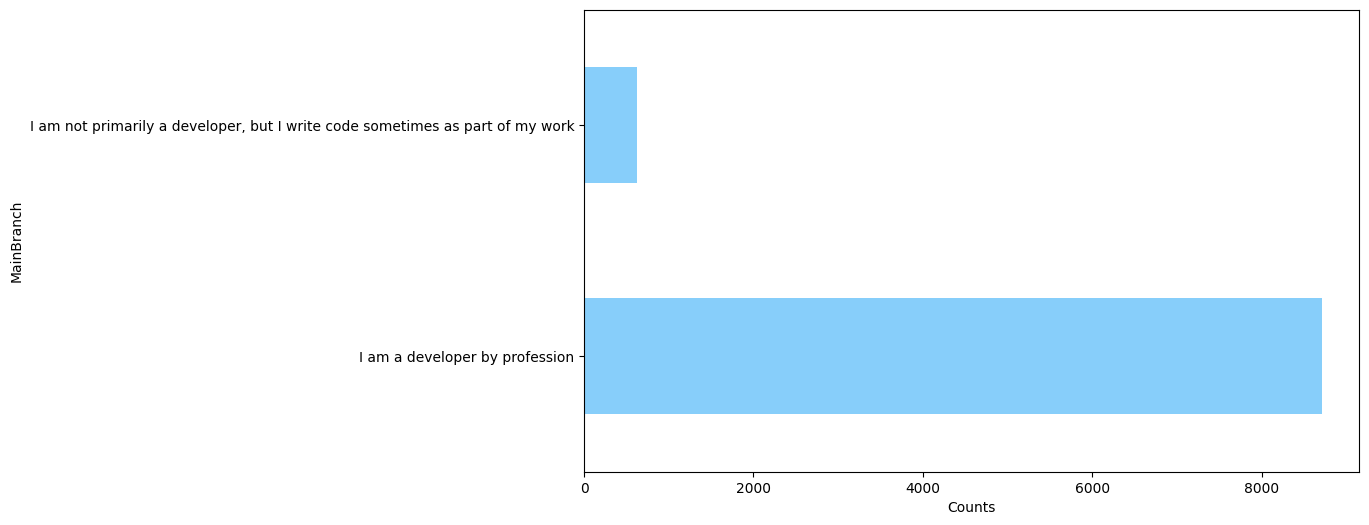

In [44]:
dm = df2[["MainBranch", "Respondent"]].groupby("MainBranch").count()
# dm.reset_index(inplace=True)

dm.plot(kind='barh', figsize=(10,6), color='lightskyblue', legend=None)
plt.xlabel("Counts")
plt.show()

In [45]:
df2.to_csv("software pro (Cleaned).csv")

<a id='con'></a>
##  Concluion :

* From the Analyze we found that most of developer take salary less than 200k per year
* Median of people have age 30
* There is no clear relationships between The Age and the Hours they work per week
* most of developer code between 0 - 35 hrs per week when increase Work hours per week this value decrease
* the top database the developer wish to learn are Postgre sql , sql server
* It's Clear also when you have experince the salary increase but slowly increasment
* most of devleloper are proffisional not write code as a part of they work